# **Stock Market Prediction using Python**

by Jay Gohil

---

# **Installing and importing necessary libraries**

---

In [ ]:
#Installing 'quandl'
!pip install quandl

In [ ]:
#Impoting necessary packages and libraries
import quandl, math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# **Taking data of stock from 'quandl'**

---

In [ ]:
#Defining the API key for Qyandl
auth_tok = "zT6DNLxAdJuUdyySgxGN"

#Taking the data from Quandle into variable 'data'
data = quandl.get("EOD/AAPL", trim_start = "2000-12-12", trim_end = "2020-12-30", authtoken=auth_tok)

#Printing the dataset
print(data)

              Open     High      Low  ...    Adj_Low  Adj_Close   Adj_Volume
Date                                  ...                                   
2013-09-03  493.10  500.600  487.350  ...  15.414405  15.453308  331928800.0
2013-09-04  499.56  502.240  496.280  ...  15.696852  15.773109  345032800.0
2013-09-05  500.25  500.680  493.640  ...  15.613351  15.664906  236367600.0
2013-09-06  498.44  499.380  489.950  ...  15.496640  15.758212  359525600.0
2013-09-09  505.00  507.920  503.480  ...  15.924581  16.009663  340687200.0
...            ...      ...      ...  ...        ...        ...          ...
2017-12-21  174.17  176.020  174.100  ...  41.820043  42.038631   83799584.0
2017-12-22  174.68  175.424  174.500  ...  41.916125  42.038631   65397776.0
2017-12-26  170.80  171.470  169.679  ...  40.758087  40.972112  132742144.0
2017-12-27  170.10  170.780  169.710  ...  40.765534  40.979318   85992852.0
2017-12-28  171.00  171.850  170.480  ...  40.950493  41.094617   65920748.0

# **Engineering the data**

---

In [ ]:
#Taking only necessary columns in dataset (for creating new columns)
data = data[['Adj_Open',  'Adj_High',  'Adj_Low',  'Adj_Close', 'Adj_Volume']]

#Creating new columns, and adding data for them using specific formula
data['HL_PCT'] = (data['Adj_High'] - data['Adj_Low']) / data['Adj_Close'] * 100.0
data['PCT_change'] = (data['Adj_Close'] - data['Adj_Open']) / data['Adj_Open'] * 100.0

#Taking only ncessary columns in final working dataset
data = data[['Adj_Close', 'HL_PCT', 'PCT_change', 'Adj_Volume']]

#Printing the updated dataset
print(data)

            Adj_Close    HL_PCT  PCT_change   Adj_Volume
Date                                                    
2013-09-03  15.453308  2.711941   -0.916650  331928800.0
2013-09-04  15.773109  1.195129   -0.173953  345032800.0
2013-09-05  15.664906  1.421447   -0.995502  236367600.0
2013-09-06  15.758212  1.892738   -0.044138  359525600.0
2013-09-09  16.009663  0.877176    0.231683  340687200.0
...               ...       ...         ...          ...
2017-12-21  42.038631  1.097080    0.482287   83799584.0
2017-12-22  42.038631  0.527970    0.188917   65397776.0
2017-12-26  40.972112  1.050009   -0.134660  132742144.0
2017-12-27  40.979318  0.627198    0.293945   85992852.0
2017-12-28  41.094617  0.800795    0.046784   65920748.0

[1090 rows x 4 columns]


# **Visualizing the dataset**

---

AxesSubplot(0.125,0.2;0.775x0.68)


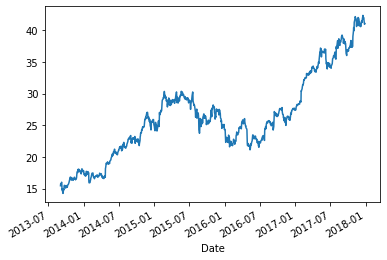

In [ ]:
print(data["Adj_Close"].plot())

AxesSubplot(0.125,0.2;0.775x0.68)


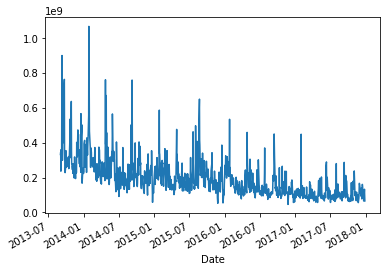

In [ ]:
print(data["Adj_Volume"].plot())

AxesSubplot(0.125,0.2;0.775x0.68)


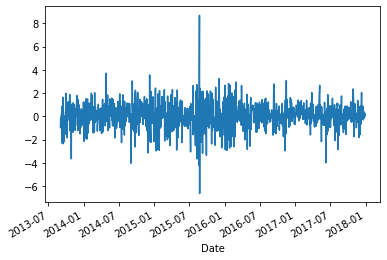

In [ ]:
print(data["PCT_change"].plot())

AxesSubplot(0.125,0.2;0.775x0.68)


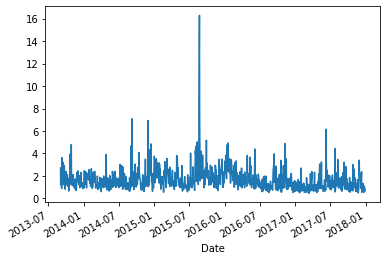

In [ ]:
print(data["HL_PCT"].plot())

Visualizing correlation between features using heatmap -->



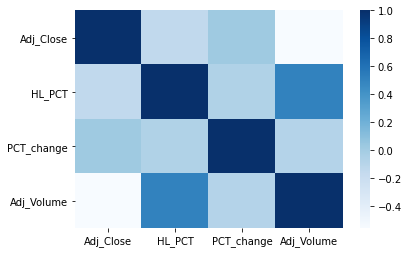

In [ ]:
#Checking correlation among features
print("Visualizing correlation between features using heatmap -->\n")
sns.heatmap(data.corr(method='pearson'), cmap='Blues')

# **Cleaning and preparing dataset for Machine Learning**

---

In [ ]:
#Defining forecasting column
forecast_col = 'Adj_Close'

#Replacing NaN values with '-99999' value which is considered as an outlier by most ML classifiers
data.fillna(value=-99999, inplace=True)

#Forecasting out 1% of the dataset's length
forecast_out = int(math.ceil(0.01 * len(data)))

#Adding a new coumn for 'label'
data['label'] = data[forecast_col].shift(-forecast_out)

In [ ]:
print(data)

            Adj_Close    HL_PCT  PCT_change   Adj_Volume      label
Date                                                               
2013-09-03  15.453308  2.711941   -0.916650  331928800.0  14.697375
2013-09-04  15.773109  1.195129   -0.173953  345032800.0  14.938388
2013-09-05  15.664906  1.421447   -0.995502  236367600.0  14.783722
2013-09-06  15.758212  1.892738   -0.044138  359525600.0  15.518464
2013-09-09  16.009663  0.877176    0.231683  340687200.0  15.469755
...               ...       ...         ...          ...        ...
2017-12-06  40.597389  2.215668    0.901493  114240000.0        NaN
2017-12-07  40.671853  0.903614    0.171567  102693232.0        NaN
2017-12-08  40.683863  1.287123   -0.656930   93420924.0        NaN
2017-12-11  41.476547  2.374472    2.050827  141095036.0        NaN
2017-12-12  41.243546  0.541060   -0.261400   77636920.0        NaN

[1079 rows x 5 columns]


In [ ]:
#Preparing X and y
X = np.array(data.drop(['label'], 1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
data.dropna(inplace=True) #Dropping NaN values
y = np.array(data['label'])

#Splitting the data into 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Training the linear regression model
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [ ]:
#Predicting y values
y_predicted = clf.predict(X_test)

#Printing predicted values
print(y_predicted)

[29.17436868 27.69510276 23.24696878 36.93608036 26.51039925 16.81235045
 35.92133442 16.02736165 25.21301436 17.126937   22.39252598 26.83094429
 29.41767428 36.78161106 22.72712335 24.05480668 26.11538553 27.22836308
 16.18278918 23.82454002 25.46776014 23.64936609 30.45657779 34.61821726
 19.80447    20.81906656 17.31861312 38.26025316 26.03512214 17.9951538
 30.0458921  28.78259694 23.18980254 18.438123   23.20535114 35.99387965
 24.91633454 17.56416495 29.5810524  22.19759908 27.12240655 32.2706946
 31.47959185 24.54405895 29.7105804  29.19938516 16.84899432 26.04443394
 27.05799879 20.2771854  24.73627465 34.56164532 25.63380698 34.28337246
 25.62721527 23.03806851 38.84402528 20.92556735 18.43155136 26.40889375
 22.90562261 39.53274254 24.22084661 18.22756605 37.02737679 15.84919197
 25.77082459 34.43043883 21.54501418 17.76290646 27.73311869 27.62159701
 23.41281511 22.16630841 27.35950899 37.92399303 17.2625361  16.01531553
 26.51633809 34.62495593 17.43238643 29.46219068 24.1

Actual values -->
[29, 27, 22, 34, 27, 16, 38, 14, 25, 17, 23, 26, 27, 33, 22, 24, 24, 29, 17, 24]

Predicted values -->
[29, 27, 23, 36, 26, 16, 35, 16, 25, 17, 22, 26, 29, 36, 22, 24, 26, 27, 16, 23]





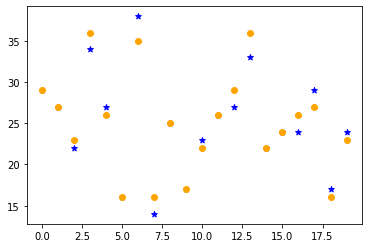

In [ ]:
temp1 = []
temp2 = []
temp3 = []

for i in range(20):
  temp1.append(int(y_test[i]))

for i in range(20):
  temp2.append(int(y_predicted[i]))


for i in range(20):
  temp3.append(i)

#Printing original values
print("Actual values -->")
print(temp1)

#Printing predicted values
print("\nPredicted values -->")
print(temp2)

print("\n"*2)

plt.scatter(temp3, temp1, marker="*", color = 'blue')
plt.scatter(temp3, temp2, color = 'orange')

In [ ]:
#Finding MSE value
MSE = mean_squared_error(y_test, y_predicted)
print("Mean Squared Error: %.5f" %MSE)

# Finding confidence value
confidence = clf.score(X_test, y_predicted)
print("Confidence:         %.5f" %confidence)

Mean Squared Error: 1.62522
Confidence:         1.00000


In [ ]:
#Making prediction on custom value
custom_pred = clf.predict([[-2.93777787e-01, -9.02387310e-01, -1.05003377e-01, -3.19550752e-01]])
print("The prediction for custom values : %.5f" % custom_pred)

The prediction for custom values : 24.58782


# **Thank you.**

---